In [1]:
import pandas as pd
import numpy as np
import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import math
import seaborn as sns
import itertools

In [110]:
def sens_and_spec(df):
    sensitivity = df['truepos'] / (df['truepos'] + df['falseneg'])
    specificity = df['trueneg'] / (df['trueneg'] + df['falsepos'])

    sensitivity[np.isnan(sensitivity)] = 0
    specificity[np.isnan(specificity)] = 0
    return(sensitivity, specificity)

def KME_mean(df, exp_name):
    df_mean = df.groupby(['b','d','KME','E','K','n_samples','n_distributions']).mean()
    df_mean['experiment'] = exp_name
    df_mean.insert(1, 'acc_std', df.groupby(['b','d','KME','E','K','n_samples','n_distributions'])[['score']].std())
    df_mean = df_mean.reset_index()
    return(df_mean)

In [111]:
results_1 = pd.read_csv('experiment_1_t_sep_impure_train_results.csv')
results_3 = pd.read_csv('experiment_3_t_sep_impure_train_results.csv')
results_cross = pd.read_csv('experiment_cross_construct_impure_train_results.csv')
results_intra = pd.read_csv('experiment_intra_construct_impure_train_results.csv')
results_latent = pd.read_csv('experiment_latent_measure_impure_train_results.csv')

In [112]:
results_1_mean = KME_mean(results_1, '1')

sensitivity_1, specificity_1 = sens_and_spec(results_1_mean)

results_3_mean = KME_mean(results_3, '3')

sensitivity_3, specificity_3 = sens_and_spec(results_3_mean)

results_cross_mean = KME_mean(results_cross, 'cross')

sensitivity_cross, specificity_cross = sens_and_spec(results_cross_mean)

results_intra_mean = KME_mean(results_intra, 'intra')

sensitivity_intra, specificity_intra = sens_and_spec(results_intra_mean)

results_latent_mean = KME_mean(results_latent, 'latent')

sensitivity_latent, specificity_latent = sens_and_spec(results_latent_mean)

In [113]:
all_mean = results_1_mean.append([results_3_mean, results_cross_mean, results_intra_mean, results_latent_mean])

In [114]:
results_1_mean

,b,d,KME,E,K,n_samples,n_distributions,train_lin,acc_std,score,trueneg,falseneg,truepos,falsepos,experiment
0,0.1,0.1,4,100,100,50,100,False,0.191720,0.883333,1.91,0.26,0.74,0.09,1
1,0.1,0.1,4,100,100,50,500,False,0.224108,0.883333,1.86,0.21,0.79,0.14,1
2,0.1,0.1,4,100,100,50,1000,False,0.221108,0.873333,1.87,0.25,0.75,0.13,1
3,0.1,0.1,4,100,100,100,100,False,0.125529,0.953333,1.98,0.12,0.88,0.02,1
4,0.1,0.1,4,100,100,100,500,False,0.147710,0.946667,1.97,0.13,0.87,0.03,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103,0.1,0.1,4,1000,1000,500,500,False,0.099098,0.983333,1.98,0.03,0.97,0.02,1
104,0.1,0.1,4,1000,1000,500,1000,False,0.057149,0.990000,2.00,0.03,0.97,0.00,1
105,0.1,0.1,4,1000,1000,1000,100,False,0.046902,0.993333,2.00,0.02,0.98,0.00,1
106,0.1,0.1,4,1000,1000,1000,500,False,0.046902,0.993333,2.00,0.02,0.98,0.00,1


In [123]:
def plot_nsamples_sns(df):
    fig, axs = plt.subplots(2,2, sharex=True, sharey=True, figsize=(12,12))
    #fig.subplots_adjust(hspace = 1.2, wspace=1.2)
    
    palette = sns.color_palette("rocket", 5)

    axs = axs.ravel()
    
    col_var = 'n_samples'

    for n, e in enumerate(df[col_var].unique()):
        new_df = df[df[col_var] == e]
        sens, spec = sens_and_spec(new_df)
        
        axs[n].plot([1, 0], [0, 1], linewidth=0.5)

        sns.scatterplot(x=spec, y=sens, ax=axs[n], palette = palette, s=80, style=new_df['n_distributions'], hue=new_df['experiment'])
        axs[n].set_title('Sample size {}'.format(e))
        axs[n].set(xlabel = 'Specificity', ylabel = 'Sensitivity')
        axs[n].set_xlim([-0.05,1.05])
        axs[n].set_ylim([-0.05,1.05])

        plt.xlabel('Specificity')
        plt.ylabel('Sensitivity')
plt.style.use('fivethirtyeight')


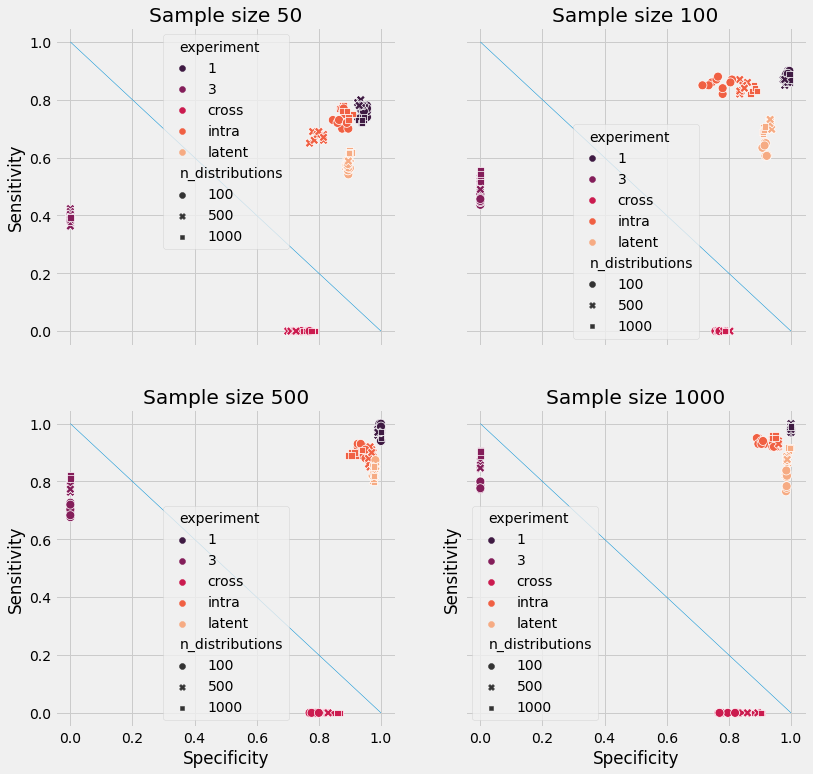

In [124]:
plot_nsamples_sns(all_mean)

In [119]:
sens, spec = sens_and_spec(all_mean)
all_mean['sens'] = sens
all_mean['spec'] = spec

In [120]:
all_mean[['E','K','n_samples','n_distributions','sens','spec']].corr()

,E,K,n_samples,n_distributions,sens,spec
E,1.000000e+00,1.208684e-16,9.211368e-17,2.743394e-17,0.002315,0.000611
K,1.208684e-16,1.000000e+00,9.211368e-17,2.425319e-17,0.007935,0.009058
n_samples,9.211368e-17,9.211368e-17,1.000000e+00,0.000000e+00,0.241554,0.071224
n_distributions,2.743394e-17,2.425319e-17,0.000000e+00,1.000000e+00,0.026445,0.017916
sens,2.314722e-03,7.934616e-03,2.415537e-01,2.644526e-02,1.000000,0.151689
spec,6.106265e-04,9.058081e-03,7.122446e-02,1.791625e-02,0.151689,1.000000
